#### Importing required packages

In [1]:
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#### Loading dataset

In [2]:
data = pd.read_csv('data.csv')
data.sample(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
223,8812877,M,15.75,20.25,102.60,761.3,0.10250,0.12040,0.114700,0.064620,...,30.29,125.90,1088.0,0.1552,0.44800,0.39760,0.14790,0.3993,0.1064,NaN
309,893548,B,13.05,13.84,82.71,530.6,0.08352,0.03735,0.004559,0.008829,...,17.40,93.96,672.4,0.1016,0.05847,0.01824,0.03532,0.2107,0.0658,NaN
562,925622,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.255000,0.094290,...,42.79,128.70,915.0,0.1417,0.79170,1.17000,0.23560,0.4089,0.1409,NaN


#### Data cleaning/pre-processing

In [3]:
data.drop('id', axis=1, inplace=True)
data.drop('Unnamed: 32', axis=1, inplace=True)

In [4]:
data.shape

(569, 31)

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [7]:
print('Null values:', data.isnull().sum().sum())
print('Duplicate values:', data.duplicated().sum())

Null values: 0
Duplicate values: 0


In [8]:
# mapping diagnosis column, 0-> M and 1-> B
mapping = {'M':1, 'B':0}
data['diagnosis'] = data.diagnosis.map(mapping)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
profile = ProfileReport(data)
profile.to_file('Initial Report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [11]:
data.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

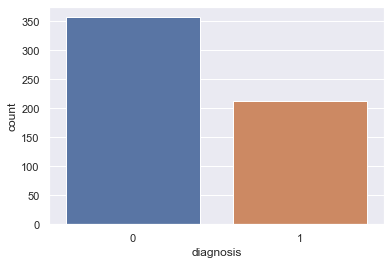

In [12]:
sns.countplot(data.diagnosis)

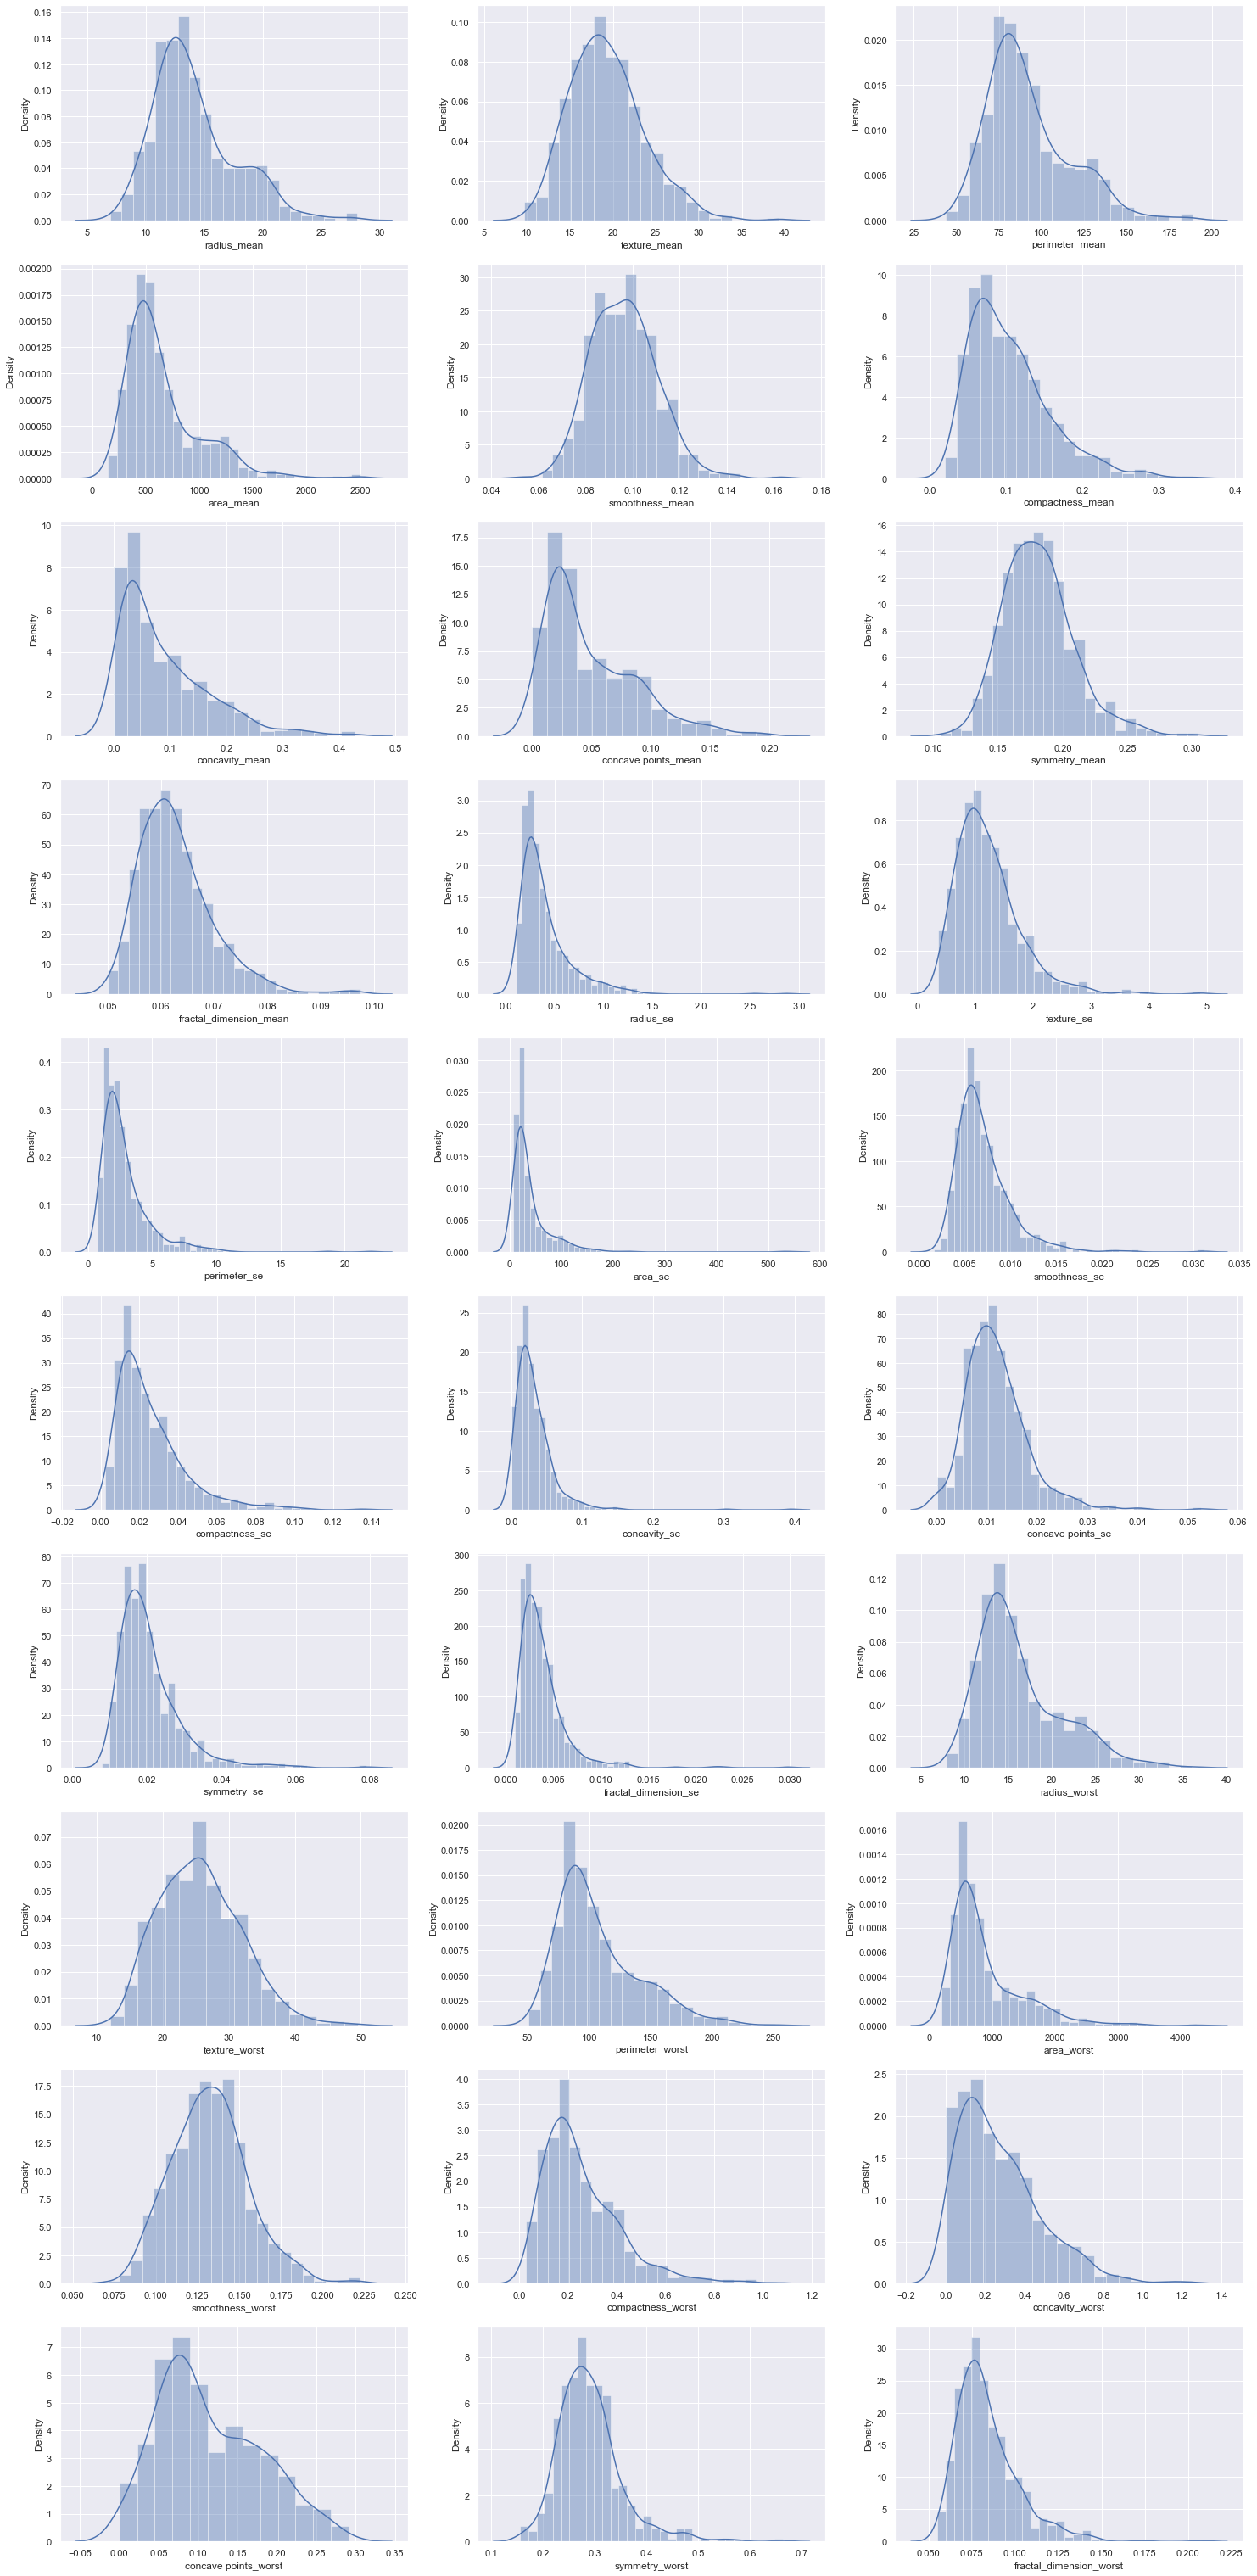

In [13]:
Columns = list(data.columns)
plt.figure(figsize = (25,55))
for i in range(1, len(Columns)):
    plt.subplot(10,3,i)
    sns.distplot(data[Columns[i]])
plt.show()

##### Outlier Detection

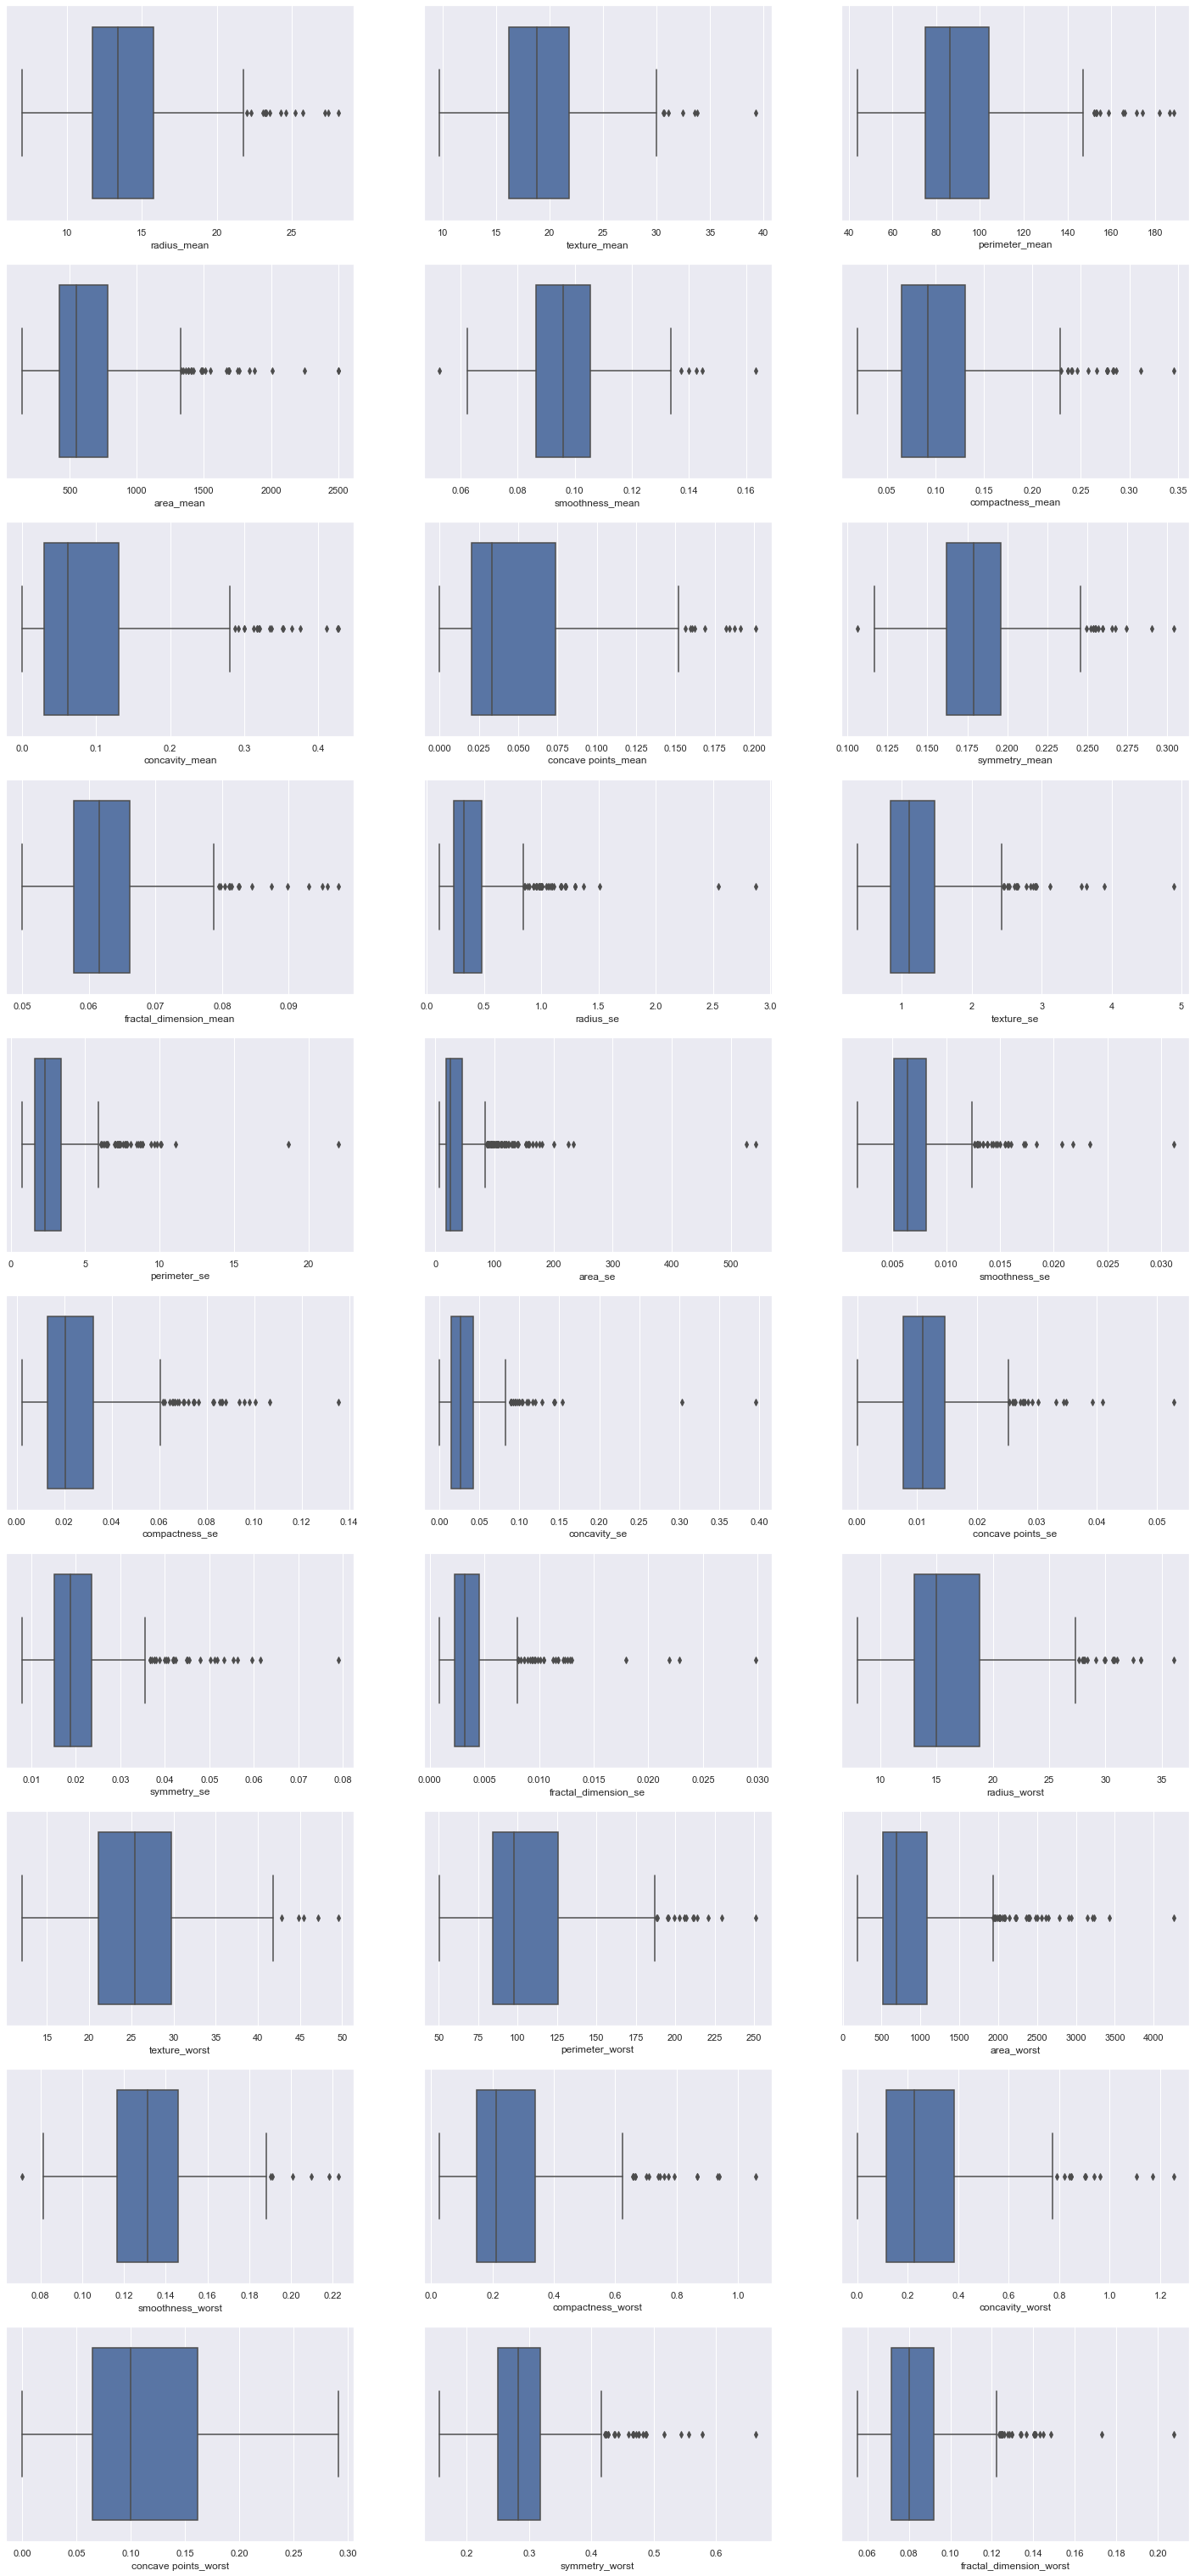

In [14]:
plt.figure(figsize = (25,55))
for i in range(1, len(Columns)):
    plt.subplot(10,3,i)
    sns.boxplot(x = data[Columns[i]])
plt.show()

##### Let's remove some outliers using z-score method

In [15]:
z = np.abs(stats.zscore(data))
data = data[(z<3).all(axis=1)]
data.shape

(495, 31)

#### Correlation in data

Text(0.5, 1.0, 'Pearson Correlation')

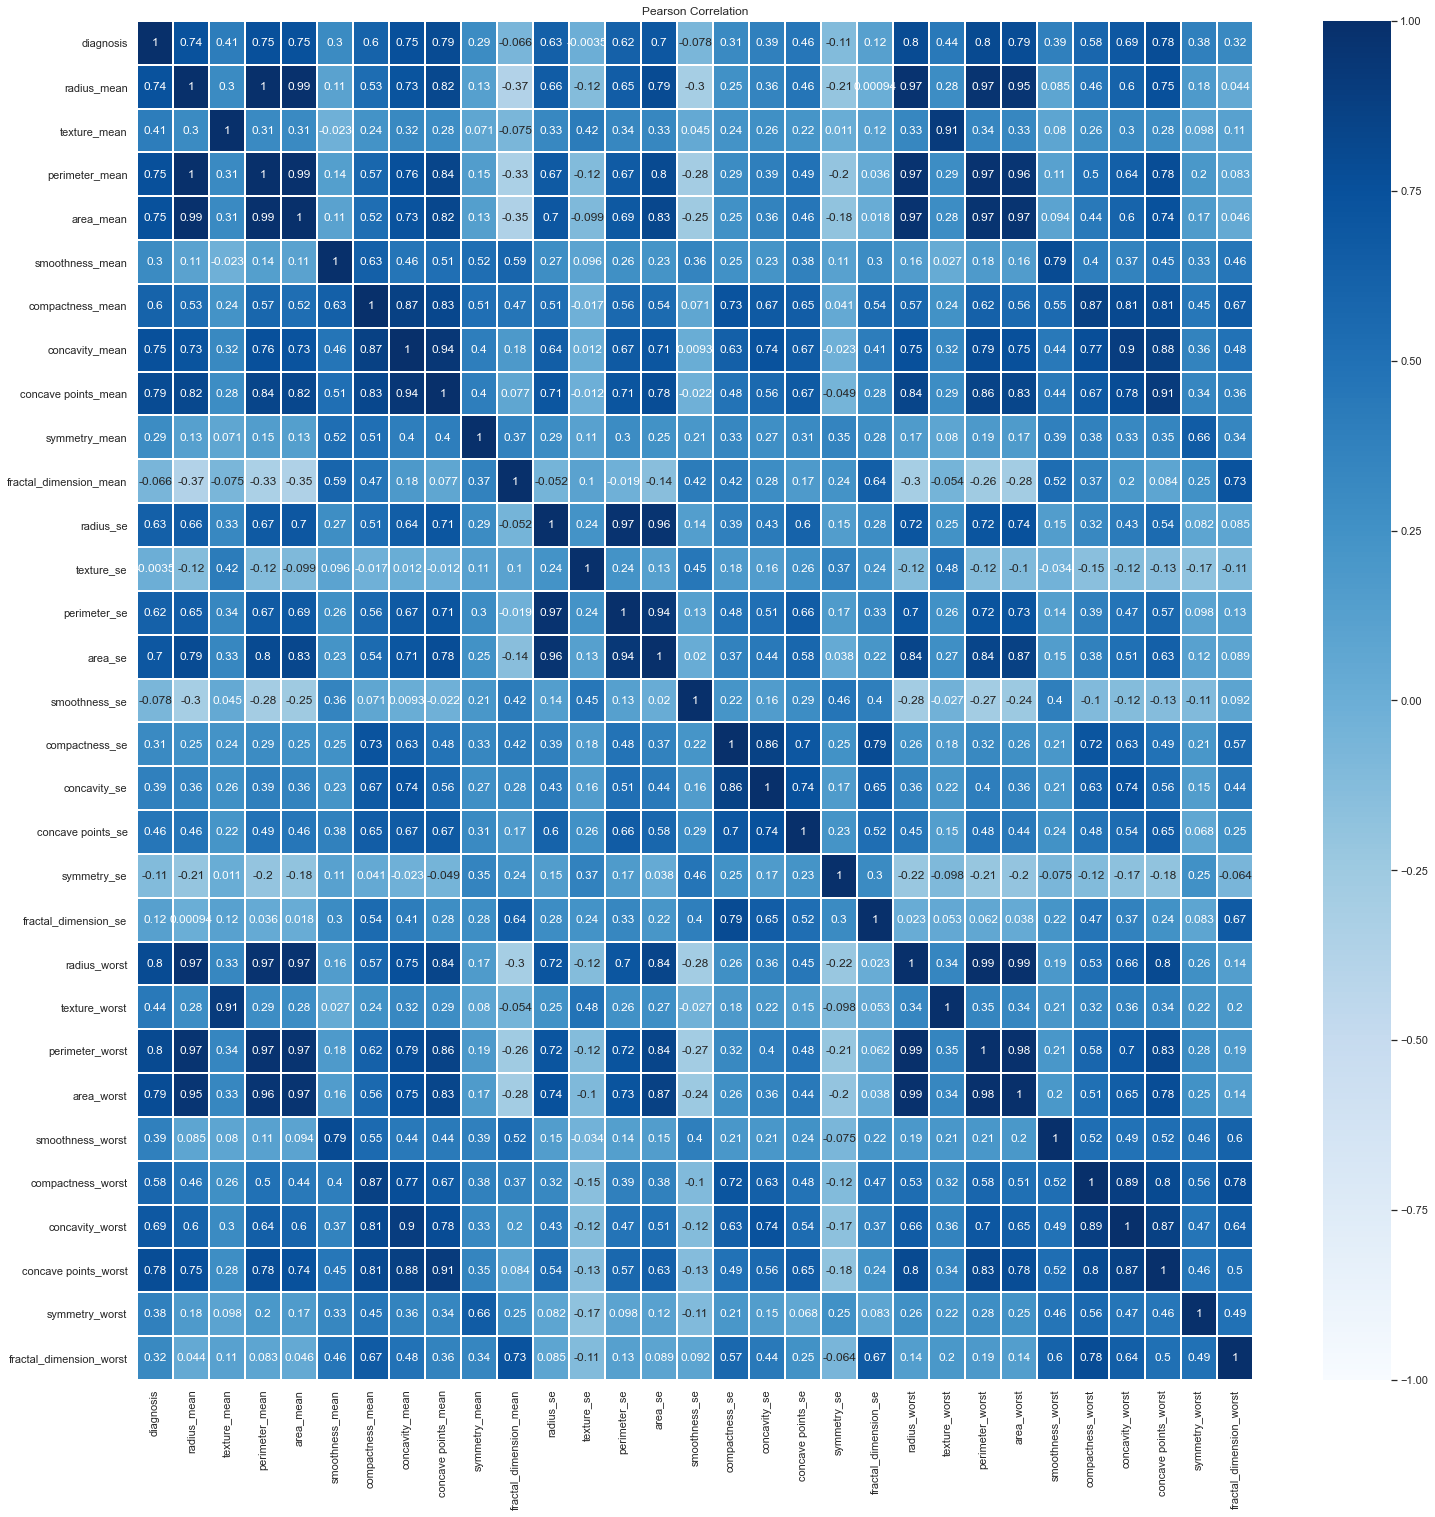

In [16]:
pearson_corr = data.corr(method = 'pearson')
fig = plt.subplots(figsize = (25,25))
sns.heatmap(pearson_corr, vmin=-1, vmax=1, cmap="Blues", annot=True, linewidth=0.1)
plt.title("Pearson Correlation")

In [17]:
corr_matrix = data[Columns[1:]].corr()
mask = corr_matrix >= 0.9
mask

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,True,False,True,True,False,False,False,False,False,False,...,True,False,True,True,False,False,False,False,False,False
texture_mean,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
perimeter_mean,True,False,True,True,False,False,False,False,False,False,...,True,False,True,True,False,False,False,False,False,False
area_mean,True,False,True,True,False,False,False,False,False,False,...,True,False,True,True,False,False,False,False,False,False
smoothness_mean,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
compactness_mean,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
concavity_mean,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
concave points_mean,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,True,False,False
symmetry_mean,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
fractal_dimension_mean,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [18]:
corr_pairs = []
for column1 in Columns[1:]:
    for column2 in Columns[1:]:
        if corr_matrix[column1][column2] >= 0.9 and column1 != column2:
            pair = (column1, column2)
            if pair not in corr_pairs and pair[::-1] not in corr_pairs:
                corr_pairs.append(pair)

In [19]:
corr_pairs

[('radius_mean', 'perimeter_mean'),
 ('radius_mean', 'area_mean'),
 ('radius_mean', 'radius_worst'),
 ('radius_mean', 'perimeter_worst'),
 ('radius_mean', 'area_worst'),
 ('texture_mean', 'texture_worst'),
 ('perimeter_mean', 'area_mean'),
 ('perimeter_mean', 'radius_worst'),
 ('perimeter_mean', 'perimeter_worst'),
 ('perimeter_mean', 'area_worst'),
 ('area_mean', 'radius_worst'),
 ('area_mean', 'perimeter_worst'),
 ('area_mean', 'area_worst'),
 ('concavity_mean', 'concave points_mean'),
 ('concave points_mean', 'concave points_worst'),
 ('radius_se', 'perimeter_se'),
 ('radius_se', 'area_se'),
 ('perimeter_se', 'area_se'),
 ('radius_worst', 'perimeter_worst'),
 ('radius_worst', 'area_worst'),
 ('perimeter_worst', 'area_worst')]

In [20]:
cols = list(set([col for i in corr_pairs for col in i]))

for col in cols:
    print('{} : {}'.format(col, data[col].corr(data['diagnosis'])))

radius_worst : 0.7958128119851954
perimeter_mean : 0.7542449389421694
area_worst : 0.785406930124152
concave points_mean : 0.7907478507553508
texture_worst : 0.4433577095676115
area_mean : 0.7456642881094346
texture_mean : 0.40711069715008225
area_se : 0.695618891792154
concavity_mean : 0.7528449996010911
radius_se : 0.6303313138719535
perimeter_worst : 0.8014012936268744
concave points_worst : 0.7799451225332391
radius_mean : 0.7412541251472121
perimeter_se : 0.6180810094846015


In [21]:
list_col = [col for col in cols if data[col].corr(data['diagnosis']) >= 0.7]
list_col

['radius_worst',
 'perimeter_mean',
 'area_worst',
 'concave points_mean',
 'area_mean',
 'concavity_mean',
 'perimeter_worst',
 'concave points_worst',
 'radius_mean']

In [22]:
for col in cols:
    if col not in list_col:
        data.drop(columns=col, inplace = True)
data.shape

(495, 26)

In [23]:
data.columns

Index(['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'texture_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

##### Selecting important features based on the correlation with diagnosis

In [24]:
selected_cols = list(['radius_mean','smoothness_worst','perimeter_mean','area_mean',
                'concavity_mean','concave points_mean','compactness_worst',
                'symmetry_se','radius_worst','perimeter_worst','area_worst',
               'concave points_worst','diagnosis'])
selected_cols

['radius_mean',
 'smoothness_worst',
 'perimeter_mean',
 'area_mean',
 'concavity_mean',
 'concave points_mean',
 'compactness_worst',
 'symmetry_se',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'concave points_worst',
 'diagnosis']

In [25]:
data = data[selected_cols]
data.head()

,radius_mean,smoothness_worst,perimeter_mean,area_mean,concavity_mean,concave points_mean,compactness_worst,symmetry_se,radius_worst,perimeter_worst,area_worst,concave points_worst,diagnosis
1,20.57,0.1238,132.90,1326.0,0.0869,0.07017,0.1866,0.01389,24.99,158.8,1956.0,0.1860,1
2,19.69,0.1444,130.00,1203.0,0.1974,0.12790,0.4245,0.02250,23.57,152.5,1709.0,0.2430,1
4,20.29,0.1374,135.10,1297.0,0.1980,0.10430,0.2050,0.01756,22.54,152.2,1575.0,0.1625,1
5,12.45,0.1791,82.57,477.1,0.1578,0.08089,0.5249,0.02165,15.47,103.4,741.6,0.1741,1
6,18.25,0.1442,119.60,1040.0,0.1127,0.07400,0.2576,0.01369,22.88,153.2,1606.0,0.1932,1


#### Feature extraction

In [26]:
x = data.drop('diagnosis', axis=1)
y = data['diagnosis']
print(x.shape)
y.value_counts()

(495, 12)


0    332
1    163
Name: diagnosis, dtype: int64

#### Train/Test split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=3)
print(x.shape, x_train.shape, x_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(495, 12) (346, 12) (149, 12)
(495,) (346,) (149,)


#### Model training

In [28]:
model = LogisticRegression()
# Training model with training data
model.fit(x_train,y_train)

LogisticRegression()

#### Model Evaluation 

In [29]:
# Accuracy on training data
x_train_pred = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_pred, y_train)
print('Accuracy score on training data:',training_data_accuracy)

Accuracy score on training data: 0.9566473988439307


In [30]:
# Accuracy on testing data
x_test_pred = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_pred, y_test)
print('Accuracy score on test data:',test_data_accuracy)

Accuracy score on test data: 0.9261744966442953


#### Generating a sample input file to apply model

In [31]:
data.to_csv('Sample_Inputs.csv')

#### Predictive system for Breast Cancer Prediction

In [32]:
sample_input = (13.54,0.144,87.46,566.3,0.06664,0.04781,0.1773,0.0198,15.11,99.7,711.2,0.1288)
sample_input = np.asarray(sample_input)
sample_input = sample_input.reshape(1,-1)
prediction = model.predict(sample_input)

In [33]:
if prediction[0]==0:
    print('Malignant')
elif prediction[0]==1:
    print('Begnin')

Malignant


#### Model Extraction

In [34]:
pkl.dump(model,open('breast_cancer.pkl','wb'))